In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a Dataframe using the csv file
df = pd.read_csv('grades.csv')
df.head()

,Physics,Math,English,Literature
0,80.0,83.0,90.0,91.0
1,83.0,85.0,89.0,88.0
2,84.0,87.0,84.0,85.0
3,80.0,82.0,91.0,89.0
4,85.0,88.0,87.0,85.0


In [3]:
# Handling Null Values

# The file containing the data contains multiple null values or missing values, which can affect the algorithms 
# used to analyze the data and the quality of the results following analysis. In this case, the null values in 
# the data columns are first displayed to determine their quantity and randomness.

df[(df["Physics"].isnull()) | (df["Math"].isnull()) | (df["English"].isnull()) | (df["Literature"].isnull())]

,Physics,Math,English,Literature
7,NaN,87.0,88.0,NaN
18,87.0,89.0,NaN,NaN
19,83.0,84.0,NaN,88.0
20,82.0,NaN,87.0,89.0


In [4]:
# According to the results, there are four records with null values in each column. Two of those records have two null 
# values, which impacts the data quality on these entries. Additionally, null values also appeared twice on some columns. 
# This results in discrepancies in the overall number of data for each column, making it difficult to construct 
# relationships between columns. Since the quantity of the records containing null values are low, and the appearance of 
# the missing values is random or not dependent on the other data, I opted to drop the records containing the null values.

df_grades = df.dropna()
df_grades.isnull().sum()

Physics       0
Math          0
English       0
Literature    0
dtype: int64

In [5]:
# 1. Which subject do students excel the most? Support your answer with analysis and explanation.

# In the analysis below, we first looked at the highest grade received by a student per subject. From the given data, 
# the highest grade received by a student in Physics and English is 93, while the highest grade a student received in Math 
# and Literature is 92.

df_grades.max()

Physics       93.0
Math          92.0
English       93.0
Literature    92.0
dtype: float64

In [6]:
# Now, if we look at the average or mean grade per subject, Math has the highest average compared to the other subjects and 
# it also has the second lowest standard deviation. A low standard deviation means that a set of data is close to the mean 
# and has little variation while a high standard deviation means that there is a large variation between the set of data 
# and the mean. This implies that in the subject, Math, all the students obtained a grade that is close to 86.06.

df_grades.mean()

Physics       85.322581
Math          86.064516
English       85.612903
Literature    85.774194
dtype: float64

In [7]:
df_grades.std()

# For this reason, despite not having the highest grade attained in Math, the students excelled more in this subject as 
# their average grades on the subject are higher than on other subjects.

Physics       3.709331
Math          3.549042
English       3.844281
Literature    3.441992
dtype: float64

In [8]:
# 2. How many students are below 87 in both Math and Physics?

# There are 15 students who got a grade of less than 87 in both Math and Physics.

df_grades[["Math", "Physics"]][(df_grades["Math"] < 87) & (df_grades["Physics"] < 87)].count()

Math       15
Physics    15
dtype: int64

In [9]:
# 3. What is/are the grade/s of the student/s in math who got the highest grade/s in Physics?

# The student who got the highest grade in Physics is student number 31. He/She received a score of 93 on the subject 
# and a grade of 91 in Math.

df_grades[df_grades["Physics"] == df_grades["Physics"].max()]

,Physics,Math,English,Literature
31,93.0,91.0,80.0,81.0


In [10]:
# If we compare student number 31's grade in Math to the highest received grade in the subject, his/her grade is 
# only a point below the highest. This implies that he/she excels in subjects requiring numerical computation 
# and analysis since his/her grade in Physics and Math are among the highest.

df_grades[df_grades["Math"] == df_grades["Math"].max()]

,Physics,Math,English,Literature
10,90.0,92.0,80.0,83.0


In [11]:
df_grades[df_grades["Math"] == 91]

,Physics,Math,English,Literature
30,92.0,91.0,81.0,83.0
31,93.0,91.0,80.0,81.0


In [12]:
# Regarding his/her grade in English and Literature, student number 31 received a low grade which is only one point higher
# than the lowest grades of each subject. 

df_grades["English"].min()

79.0

In [13]:
df_grades["Literature"].min()

80.0

In [14]:
# 4. What is/are the grade/s of the student/s in English who got the lowest grade/s in Math?

# Student number 21 received the lowest grade in Math which is 78 and the grade of 93 for English.

df_grades[df_grades["Math"] == df_grades["Math"].min()]

,Physics,Math,English,Literature
21,80.0,78.0,93.0,92.0


In [15]:
# If we look at the highest grade a student received in English, we will see that student number 21 received the highest 
# grade which is 93. Based on this data, student number 21 excels more in subjects that tackles linguistics and languages 
# rather than subjects that involve math and sciences.

df_grades[df_grades["English"] == df_grades["English"].max()]

,Physics,Math,English,Literature
21,80.0,78.0,93.0,92.0


In [16]:
# To back up that claim, we will check the lowest grade in Physics and the highest grade in Literature. 
# From the analysis below, student 21 also received the lowest grade in Physics and the highest grade in Literature.

df_grades[df_grades["Physics"] == df_grades["Physics"].min()]

,Physics,Math,English,Literature
0,80.0,83.0,90.0,91.0
3,80.0,82.0,91.0,89.0
21,80.0,78.0,93.0,92.0


In [17]:
df_grades[df_grades["Literature"] == df_grades["Literature"].max()]

,Physics,Math,English,Literature
21,80.0,78.0,93.0,92.0


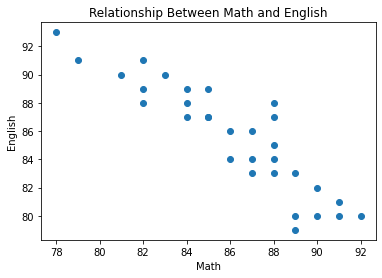

In [18]:
# 5. How can you describe the relationship between Math and English?

# To demonstrate the relationship between the Math and English subjects, we used a scatter plot to represent the 
# students as data points on a Cartesian plane where the y-axis reflects the English grades and the x-axis reflects 
# the Math grades. Based the plotted graph, there is a negative correlation or inverse relationship between Math and  
# English. This is more evident once we draw a trend line on the graph that descends left to right.

# The relationship between Math and English suggests that students with higher grades in Math tend to have lower grades in 
# English and vice versa. This indicates that students who are proficient in Math experience difficulty while learning 
# English and students who are proficient in English struggle to learn Math. With this data, the teachers can determine
# and focus on improving the students' weakness.


plt.scatter(df_grades["Math"], df_grades["English"])
plt.title("Relationship Between Math and English")
plt.xlabel("Math")
plt.ylabel("English")
plt.show()

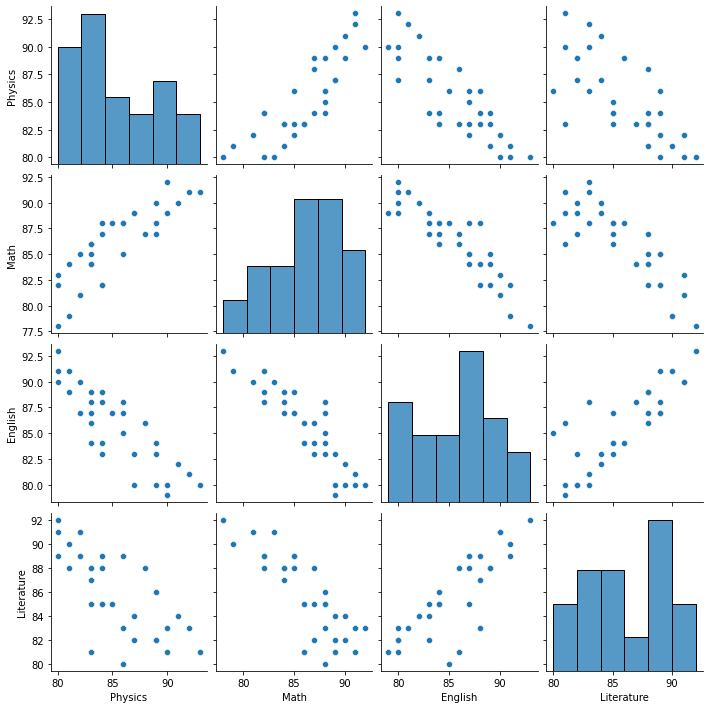

In [19]:
# Conclusion:

# We can also examine the relationships between each field to reach a more convincing conclusion. In the graph generated 
# below using the seaborn package, we will see that the relationship between Physics and Math and the relationship between 
# English and Literature show a positive correlation. In contrast, the relationship between Physics and English or Physics
# and Literature, and Math and English or Math and Literature shows a negative correlation. This implies that students who
# receive high grades in English would possibly also receive high grades in Literature but lower grades in Physics and 
# Math. This is evident in the analysis conducted for student number 21. This student showed excellence in the English 
# and Literature subjects as he/she received the highest grades for the two subjects. However, the same student also
# received the lowest grades for Physics and Math. This is an extreme example of a student who excelled in one field but 
# struggled in another. Student number 31, on the other hand, showed proficiency in Physics and Math while lacking in 
# English and Literature. He/She is the opposite of student number 21 as they excel in the opposite fields of study.

# Overall, analyzing a student’s grade can help teachers predict a student’s weaknesses based on their strengths.
# This may not be applicable to all students, but it can be a useful starting point for developing lesson plans that 
# help students improve on the subjects they are struggling with.

sns.pairplot(df_grades)